In [4]:
import aiproteomics
import tensorflow as tf

# Load models

# New model

# Prosit1

2024-01-22 11:22:14.707835: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-01-22 11:22:14.707851: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-01-22 11:22:14.707861: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (godsnor-XPS-9320): /proc/driver/nvidia/version does not exist
2024-01-22 11:22:14.708227: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-22 11:22:15.701446: I tensorflow/core/grappler/dev

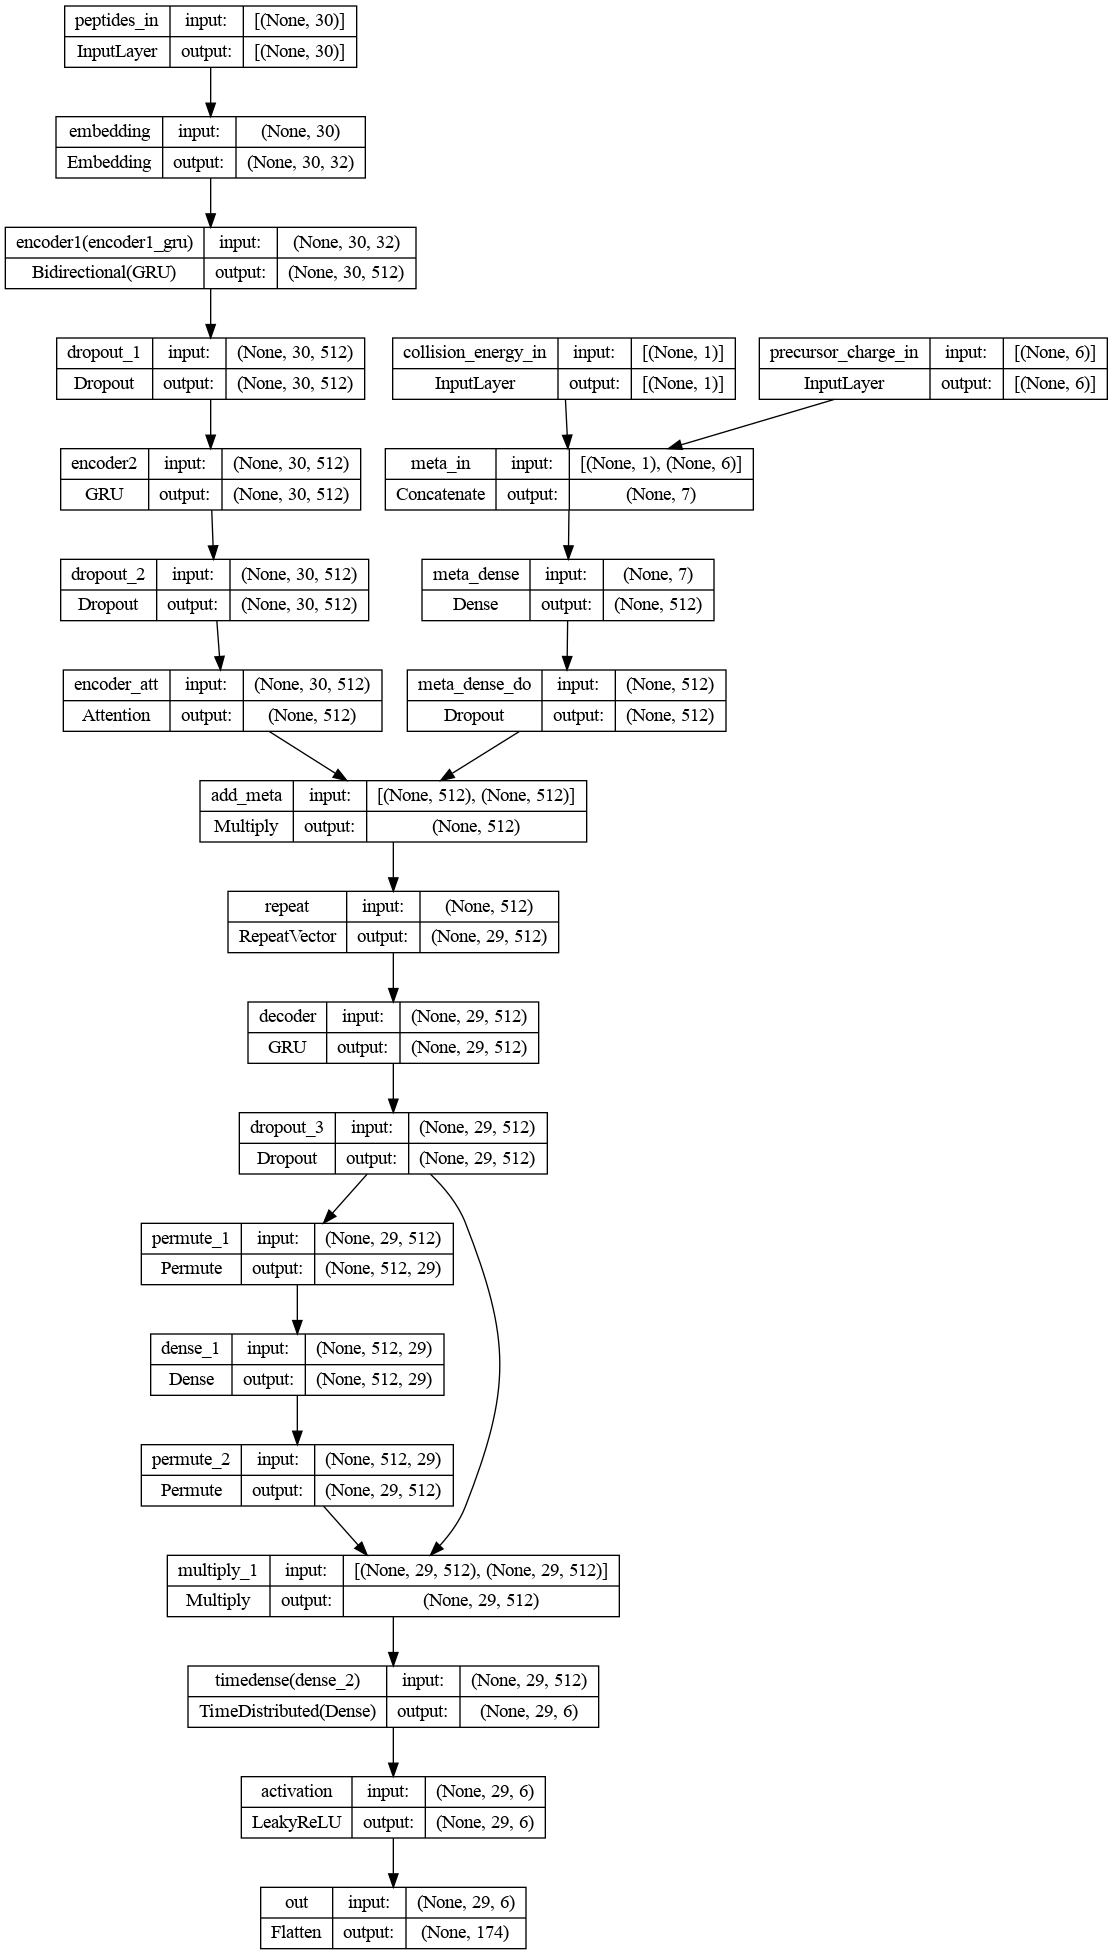

In [2]:
from aiproteomics.modelgen.prosit1_gen import build_prosit1_model

model_prosit = build_prosit1_model()

# Load trained weights from (old) fragmentation transformer model
model_prosit.load_weights('prosit/weight_32_0.10211.hdf5')

# Make a plot of the model
tf.keras.utils.plot_model(model_prosit, show_shapes=True)

## Load holdout dataset

In [7]:
from aiproteomics.datasets.DataSetPrositFrag import DataSetPrositFrag

holdout_dataset = DataSetPrositFrag('holdout_hcd.hdf5')

## Perform the spectral angle comparison for a trained model

In [8]:
from aiproteomics.comparison.ComparisonPrositFrag import ComparisonPrositFrag

In [ ]:
ComparisonPrositFrag.compare_spectral_angle_distributions(holdout_dataset, model_prosit)

# Or plot the distributions per collision energy

## Prosit

23570/23570 [==============================] - 1100s 47ms/step


<Axes: xlabel='collision_energy', ylabel='normalized_spectral_contrast_distance'>

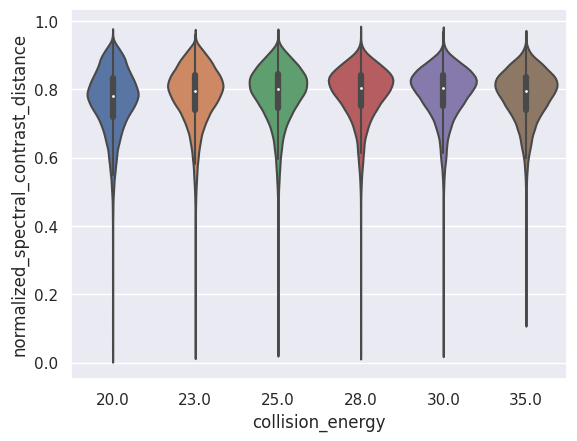

In [6]:
ComparisonPrositFrag.plot_spectral_angle_distributions(holdout_dataset, model_prosit)

# Early fusion transformer model

We may now perform the same analysis for the early fusion transformer model (128 dim embeddings)

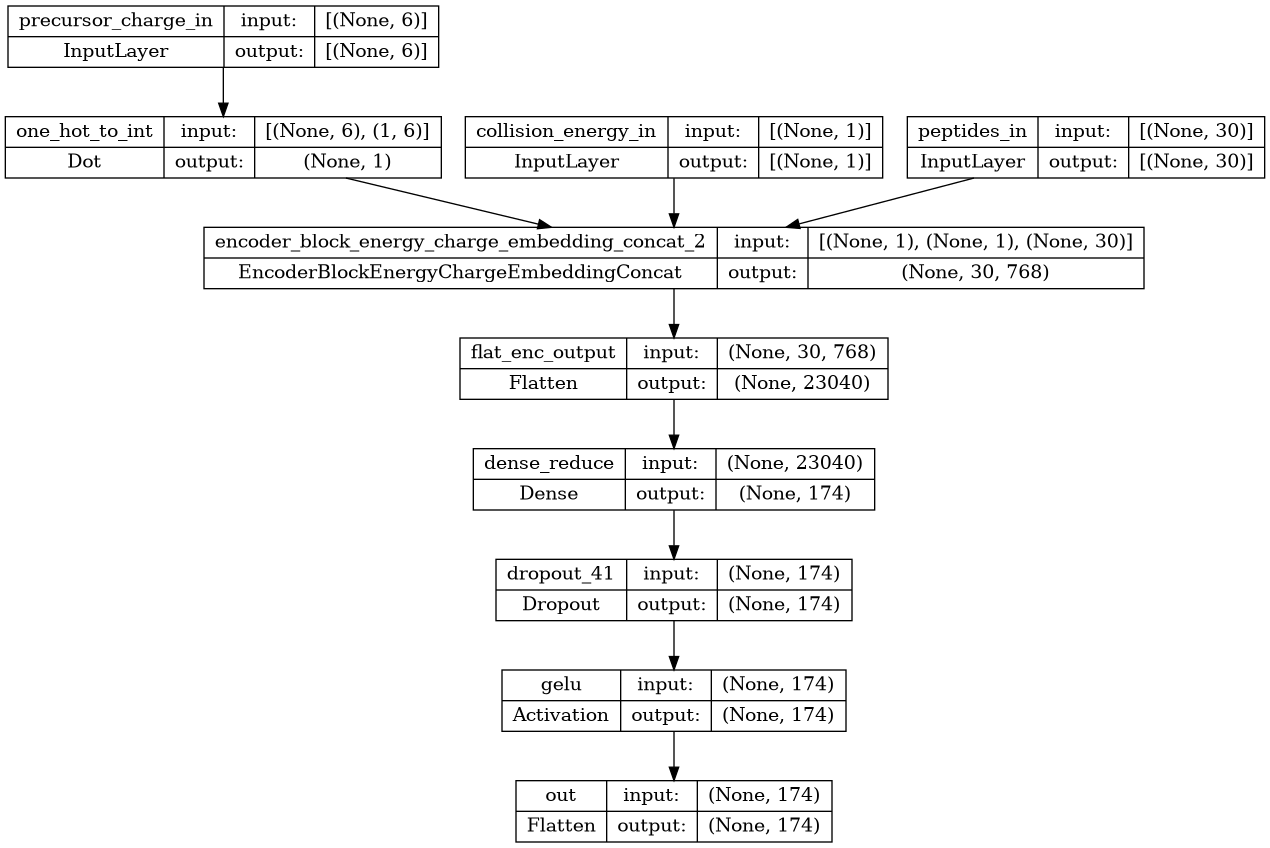

In [5]:
from aiproteomics.frag.models.early_fusion_transformer import build_model_early_fusion_transformer

model_transformer = build_model_early_fusion_transformer()

# Make a plot of the model
tf.keras.utils.plot_model(model_transformer, show_shapes=True)

In [ ]:
ComparisonPrositFrag.plot_spectral_angle_distributions(holdout_dataset, model_transformer)

 1994/23570 [=>............................] - ETA: 3:24:42